In [1]:
import networkx as nx

In [32]:
from typing import List, Dict
from queue import PriorityQueue, Queue, LifoQueue
import numpy as np 
from matplotlib import pyplot as plt

class Vertex:
    def __init__(self, label, edges:Dict[int, float]):
        self.label = label
        self.edges = edges
        
class Graph:
    
    def __init__(self, v_count:int):
        
        self._matrix = np.zeros((v_count,v_count), np.float32)
        self._vertices = {}
        self._dist = None
        self._prev = None
        self._src = None
        
        for v in range(v_count):
            self._vertices[v] = Vertex(v, {})
        
    def add_edge(self, u:int, v:int, w:float):
        if self._vertices.get(u) and self._vertices.get(v):
            self._matrix[u, v] = w
            self._matrix[v, u] = w
            self._vertices[u].edges[v] = w
            self._vertices[v].edges[u] = w
    
    def dijkstra(self, src: int):
        dist = np.full(self._matrix.shape[0], np.inf) 
        prev = np.ones(self._matrix.shape[0], np.int32) * -1
        dist[src] = 0
        
        q = PriorityQueue()
        for v in self._vertices.keys():
            q.put((v, dist[v]))
            
        while not q.empty():
            u, _ = q.get()
            for v in self._vertices[u].edges.keys():
                w = self._vertices[u].edges[v]
                
                alt = dist[u] + w if dist[u] != np.inf else w
                
                if alt < dist[v]:
                    dist[v] = alt
                    prev[v] = u
                    q.put((v, alt))
                
        self._dist = dist
        self._prev = prev
        self._src = src
        return dist, prev
    
    def bfs(self, src: int, target:int=None):
        explored = np.zeros(self._matrix.shape[0], np.int32)
        explored[src] = 1

        
        q = Queue()
        q.put(src)
            
        while not q.empty():
            u = q.get()
            
            if target and u == target: 
                return u
            else:
                print(u, end=' ')
                
            for v in self._vertices[u].edges.keys():
                if explored[v] == 0:
                    explored[v] = 1
                    q.put(v)
    
        return None
    
    def dfs(self, src: int, target:int=None):
        explored = np.zeros(self._matrix.shape[0], np.int32)
        explored[src] = 1
        
        q = LifoQueue()
        q.put(src)
            
        while not q.empty():
            u = q.get()
            
            if target and u == target: 
                return u
            else:
                print(u, end=' ')
                
            for v in self._vertices[u].edges.keys():
                if explored[v] == 0:
                    explored[v] = 1
                    q.put(v)
    
        return None
    
    def shortest_path (self, target:int):
        if self._src is not None: 
            s = []
            u = target
            if self._prev[u] != -1 or u == self._src:
                while u != -1:
                    s.append(u)
                    u = self._prev[u]
            return s
        else:
            return None
    
    def show(self):
        g = nx.from_numpy_matrix(self._matrix, create_using=nx.DiGraph)
        
        pos=nx.spring_layout(g)              
        nx.draw(g, pos, with_labels=True, font_size=10)
        nx.draw_networkx_edge_labels(g, pos, edge_labels=None, label_pos=0.5, 
                                     font_size=8, font_color='k', font_family='serif',
                                     font_weight='normal', alpha=1.0, bbox=None, 
                                     horizontalalignment='center', rotate=True)
        plt.show()

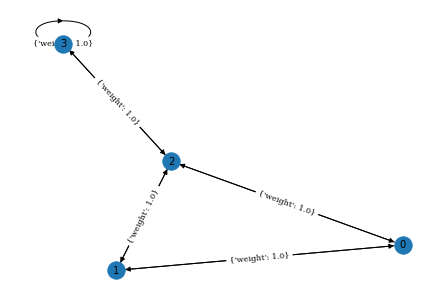

In [33]:
g = Graph(4)
g.add_edge(0, 1, 1)
g.add_edge(0, 2, 1)
g.add_edge(1, 2, 1)
g.add_edge(2, 0, 1)
g.add_edge(2, 3, 1)
g.add_edge(3, 3, 1)
g.show()

In [34]:
g.dfs(1)

1 2 3 0 

In [35]:
g.bfs(1)

1 0 2 3 

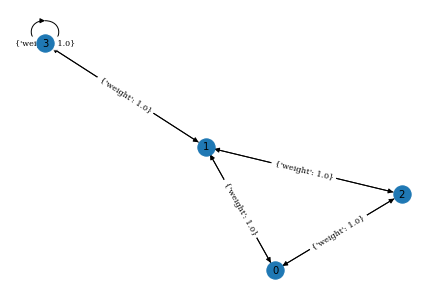

In [36]:
g = Graph(4)
g.add_edge(2, 0, 1)
g.add_edge(0, 1, 1)
g.add_edge(0, 2, 1)
g.add_edge(1, 2, 1)
g.add_edge(1, 3, 1)
g.add_edge(3, 1, 1)
g.add_edge(3, 3, 1)
g.add_edge(1, 3, 1)

g.show()

In [30]:
g.bfs(2)

2 0 1 3 

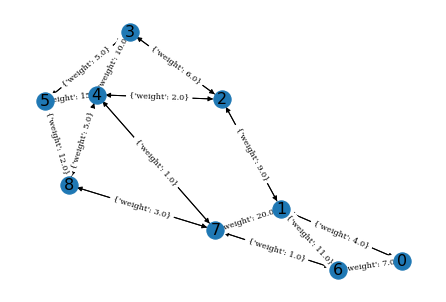

In [31]:
g = Graph(9)
g.add_edge(0, 1, 4)
g.add_edge(0, 6, 7)
g.add_edge(1, 6, 11)
g.add_edge(1, 7, 20)
g.add_edge(1, 2, 9)
g.add_edge(2, 3, 6)
g.add_edge(2, 4, 2)
g.add_edge(3, 4, 10)
g.add_edge(3, 5, 5)
g.add_edge(4, 5, 15)
g.add_edge(4, 7, 1)
g.add_edge(4, 8, 5)
g.add_edge(5, 8, 12)
g.add_edge(6, 7, 1)
g.add_edge(7, 8, 3) 
g.show()

In [7]:
g.dijkstra(0)
path = g.shortest_path(5)

path

[5, 3, 2, 4, 7, 6, 0]

In [8]:
g._prev

array([-1,  0,  4,  2,  7,  3,  0,  6,  7], dtype=int32)

In [9]:
g._matrix

array([[ 0.,  4.,  0.,  0.,  0.,  0.,  7.,  0.,  0.],
       [ 4.,  0.,  9.,  0.,  0.,  0., 11., 20.,  0.],
       [ 0.,  9.,  0.,  6.,  2.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  6.,  0., 10.,  5.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 10.,  0., 15.,  0.,  1.,  5.],
       [ 0.,  0.,  0.,  5., 15.,  0.,  0.,  0., 12.],
       [ 7., 11.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0., 20.,  0.,  0.,  1.,  0.,  1.,  0.,  3.],
       [ 0.,  0.,  0.,  0.,  5., 12.,  0.,  3.,  0.]], dtype=float32)

In [10]:
for v in range(len(g._dist)):
    print("Distance from vertex 0 to vertex", v, "is", g._dist[v])

Distance from vertex 0 to vertex 0 is 0.0
Distance from vertex 0 to vertex 1 is 4.0
Distance from vertex 0 to vertex 2 is 11.0
Distance from vertex 0 to vertex 3 is 17.0
Distance from vertex 0 to vertex 4 is 9.0
Distance from vertex 0 to vertex 5 is 22.0
Distance from vertex 0 to vertex 6 is 7.0
Distance from vertex 0 to vertex 7 is 8.0
Distance from vertex 0 to vertex 8 is 11.0


```
Distance from vertex 0 to vertex 0 is 0
Distance from vertex 0 to vertex 1 is 4
Distance from vertex 0 to vertex 2 is 11
Distance from vertex 0 to vertex 3 is 17
Distance from vertex 0 to vertex 4 is 9
Distance from vertex 0 to vertex 5 is 22
Distance from vertex 0 to vertex 6 is 7
Distance from vertex 0 to vertex 7 is 8
Distance from vertex 0 to vertex 8 is 11
```

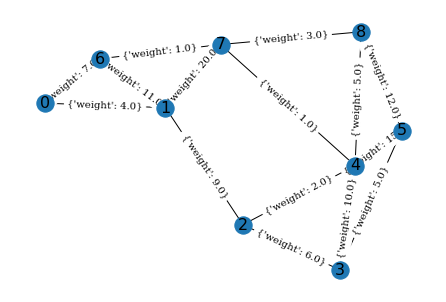

In [11]:
g.show()

In [12]:
print(g.bfs(0, 8))

0 1 6 7 2 4 8


In [14]:
print(g.dfs(0, 8))

0 6 7 8
